In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 120
import cv2 as cv
import matplotlib.image as mpimg
from scipy.spatial import Voronoi, voronoi_plot_2d

from skimage import data
from skimage.filters import threshold_local, threshold_otsu
from skimage.color import rgb2gray
from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

In [27]:
imgs_path = r"..\data\Ki67\SHIDC-B-Ki-67\Train"

In [32]:
def binarize(img_name):
    fig, axs = plt.subplots(1,3)
    
    img_path= os.path.join(imgs_path,img_name)
    img_orginal = plt.imread(img_path+".jpg")
    axs[0].imshow(img_orginal)
    img_grey = rgb2gray(img_orginal)
    
    
    
    global_thresh = threshold_otsu(img_grey)
    binary_global = img_grey > global_thresh
    
    block_size = 35
    binary_adaptive = threshold_local(img_grey, block_size, offset=10)
    
    axs[0].imshow(img_orginal)
    axs[1].imshow(binary_global)
    axs[2].imshow(binary_adaptive )
    fig.show()
    edges = canny(img_grey, sigma=2.0,
              low_threshold=0.1, high_threshold=0.8)
    result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
    result.sort(order='accumulator') 
    
    # Estimated parameters for the ellipse
    best = list(result[-1])
    yc, xc, a, b = [int(round(x)) for x in best[1:5]]
    orientation = best[5]

    # Draw the ellipse on the original image
    cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
    image_rgb[cy, cx] = (0, 0, 255)
    # Draw the edge (white) and the resulting ellipse (red)
    edges = color.gray2rgb(img_as_ubyte(edges))
    edges[cy, cx] = (250, 0, 0)

    fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                                    sharex=True, sharey=True)
    ax1.set_title('Original picture')
    ax1.imshow(img_orginal)

    ax2.set_title('Edge (white) and result (red)')
    ax2.imshow(edges)

    plt.show()

<ipython-input-32-998ece56bc6a>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ValueError: Cannot specify order when the array has no fields.

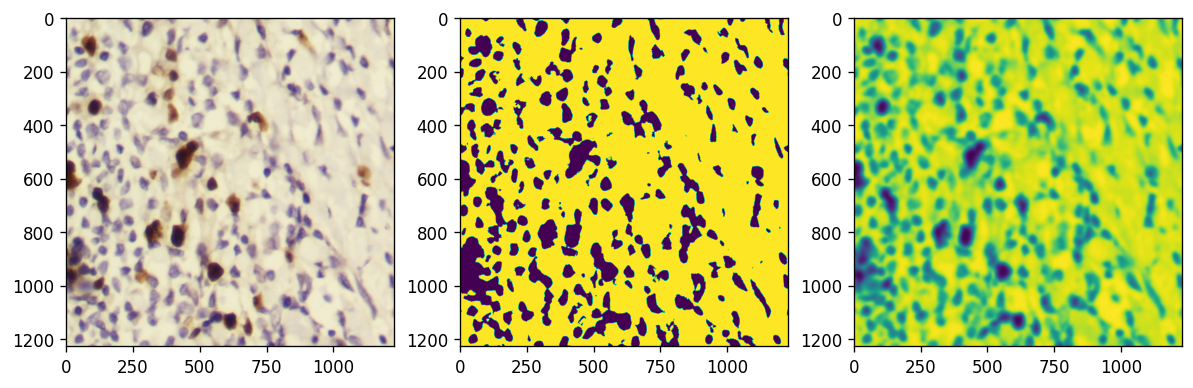

In [33]:
binarize("p1_0299_6")